* Normalizing helps in getting better convergence in training data

In [1]:
import matplotlib.pyplot as plt
import numpy as np

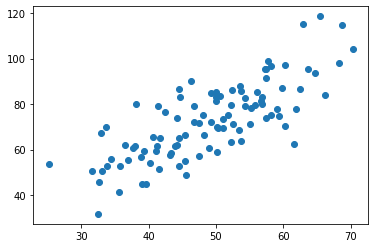

In [2]:
import pandas as pd

raw_data = pd.read_csv('data.txt', sep = ',', header = None)
X = raw_data.iloc[:,0].values
y = raw_data.iloc[:,1].values
X_1 = X.reshape(len(X), 1)
plt.scatter(X,y)
plt.show()

### Using scikit library

Accuracy of model:  0.59

Intercept:  15.07636055026471

slope:  [1.19463787]


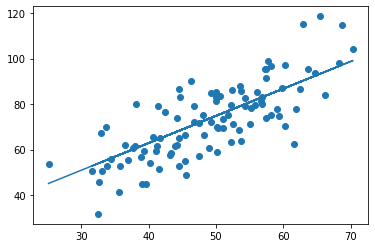

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_1, y, test_size=0.2, random_state=42)


from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X = X_train,
          y = y_train)

print("Accuracy of model: ", round((model.score(X = X_1,
                                                y = y)),2))
print()
print('Intercept: ', model.intercept_)
print()
print('slope: ', model.coef_)

predicted_value = model.predict(X = X_1)

plt.scatter(X, y)
plt.plot(X, predicted_value)
plt.show()

### Using gradient descent algorithm

Accuracy of model:  0.59

Intercept:  15.07636055026471

slope:  [1.19463787]


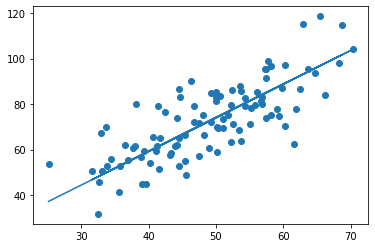

In [6]:
b = 0
w_1 = 0
count = 0
w_1_list = []
b_list = []
loss_function_list = []
while count < 1000:
    predicted_y = b + (w_1 * X)
    loss_function = (np.sum(predicted_y - y)**2) * 0.5
    gradient_of_w_1 = np.sum(((predicted_y - y) * X))
    gradient_of_b = np.sum(((predicted_y - y) * 1))
    learning_rate = 0.000001
    w_1 = w_1 - (learning_rate * gradient_of_w_1)
    b = b - (learning_rate * gradient_of_b)
    w_1_list.append(w_1)
    b_list.append(b)
    loss_function_list.append(loss_function)
    count = count + 1
    
pred = b_list[np.argmin(loss_function_list)] + ((w_1_list[np.argmin(loss_function_list)])* X)

print("Accuracy of model: ", round(r_square(y, pred),2))
print()
print('Intercept: ', model.intercept_)
print()
print('slope: ', model.coef_)

plt.scatter(X, y)
plt.plot(X, pred)
plt.show()

In [5]:
def r_square(y, pred):
    mean_value = np.mean(y)
    total = np.sum((y - mean_value)**2)
    residuals = np.sum((y - pred)**2)
    return 1 - (residuals / total)